# 1-D Exploratory Data Analysis

In this notebook, do some EDA in one dimension. Pick a column  (or a set of columns) you're interested in looking at. Calculate some summary statistics (like mean,median,min,max,sd). Then, make some plots to visualize the distribution of the data. Distirbution plots include things like histograms, boxplots, dotplots, beeswarms, and violin plots. Review [ggplot-intro](https://github.com/data4news/ggplot-intro) for examples of these kinds of distribution plots.

### Standard Python and R imports

In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

# My commonly used R imports

require('tidyverse')

R[write to console]: Loading required package: tidyverse



── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [4]:
pd.set_option('display.max_columns', None)

### Load the data

In [5]:
# Import data with Python
merged_data = pd.read_csv("merged_data.csv")
merged_data.head()

,Job.Number,Borough.Name,Count.Permits,First.Permit.Date,Current.Date,Age..in.years.,Permit.Expiration.Date,Sidewalk.Shed.Linear.Feet,Construction.Material,Current.Job.Status,BIN.Number,Community.Board,Latitude.Point,Longitude.Point,House.Number,Street.Name,Borough.Digit,Block,Lot,Applicant.Business.Name,ProCert,Source,activity,Commercial,GEOID,STATE,COUNTY,TRACT,BLOCK,NAME,population_estimate,black_african_estimate,occupied_estimate,vacant_estimate,owner_occupied_estimate,renter_occupied_estimate,owner_income_estimate,renter_income_estimate,population_moe,black_african_moe,occupied_moe,vacant_moe,owner_occupied_moe,renter_occupied_moe,owner_income_moe,renter_income_moe
0,120351662,Manhattan,0.0,5/13/2010,5/3/2025,14.980822,4/22/2026,56.0,STEEL,R,1050240,108,40.78184,-73.94844,1772,2 AVENUE,1,1555,4,CS BRIDGE CORP,1,BIS,Construction or Maintenance,Commercial District/Overlay,36061015402,36,61,15402,3000,"Census Tract 154.02, New York County, New York",3579,931,1681,427,659,1022,212008.0,103182.0,1259,1007,314,227,235,206,127402.0,28807.0
1,120470409,Manhattan,0.0,9/16/2010,5/3/2025,14.635616,6/17/2025,65.0,STEEL/WOOD,R,1017833,105,40.73590,-73.98799,116,EAST 17 STREET,1,872,68,ROCKLEDGE SCAFFOLD CORP,1,BIS,Construction or Maintenance,Other Zoning Districts,36061005000,36,61,5000,2000,"Census Tract 50, New York County, New York",5042,70,2852,622,1424,1428,195956.0,138364.0,814,74,299,246,309,222,72736.0,33353.0
2,120486633,Manhattan,0.0,9/29/2010,5/3/2025,14.600000,9/20/2025,100.0,WOOD AND STEEL,R,1079685,103,40.72631,-73.97949,605,EAST 9 STREET,1,392,10,ROCKLEDGE SCAFFOLD CORP,1,BIS,Construction or Maintenance,Other Zoning Districts,36061002800,36,61,2800,3001,"Census Tract 28, New York County, New York",6483,1146,3073,303,482,2591,156071.0,44028.0,901,639,306,168,162,321,73124.0,12781.0
3,120725705,Manhattan,0.0,6/16/2011,5/3/2025,13.887671,3/11/2026,314.0,WOOD & STEEL,R,1026319,104,40.75827,-73.99532,443,WEST 40 STREET,1,1050,6,BS GROUP INC,1,BIS,Construction or Maintenance,Commercial District/Overlay,36061011500,36,61,11500,2002,"Census Tract 115, New York County, New York",3367,409,1750,565,239,1511,217356.0,134427.0,701,229,194,163,89,189,85738.0,48688.0
4,120987236,Manhattan,0.0,3/1/2012,5/3/2025,13.178082,6/18/2025,77.0,WOOD & STEEL,R,1083575,104,40.74551,-74.00375,444,WEST 21 STREET,1,718,1,ARSENAL SCAFFOLD INC,1,BIS,Construction or Maintenance,Other Zoning Districts,36061008900,36,61,8900,4001,"Census Tract 89, New York County, New York",5844,306,3095,603,974,2121,158555.0,88665.0,620,231,345,206,224,344,23669.0,37651.0


In [6]:
sheds_by_census_tract = merged_data.pivot_table(
    index='GEOID',
    values='Job.Number',
    aggfunc='count') \
    .reset_index() \
    .rename(columns={'Job.Number': 'active_shed_licenses'})
# aggfunc='count'  counts the number of non-null entries in the "values" column for each group defined by the "index".

sheds_by_census_tract

,GEOID,active_shed_licenses
0,36005000400,1
1,36005001600,2
2,36005001901,3
3,36005001902,8
4,36005001903,1
...,...,...
1546,36085027702,1
1547,36085027706,2
1548,36085027900,1
1549,36085030302,1


In [7]:
from dotenv import load_dotenv
load_dotenv() # <- searches for a file named .env and loads the environment variables in it

False

In [8]:
%%R 

require('tidycensus')

# because it an environment variable, we don't have to 
# explicitly pass this string to R, it is readable here
# in this R cell.
census_api_key(Sys.getenv("CENSUS_API_KEY"))

R[write to console]: Loading required package: tidycensus

R[write to console]: To install your API key for use in future sessions, run this function with `install = TRUE`.



In [9]:
%%R 
require("tigris")

R[write to console]: Loading required package: tigris

R[write to console]: To enable caching of data, set `options(tigris_use_cache = TRUE)`
in your R script or .Rprofile.



In [10]:
%%R 

# long-form data: with only one numeric data

# the variable B01003_001 was selectd from the census table 
# for population, which we found in censusreporter here:
# https://censusreporter.org/tables/B01003/


# Here are the various geographies you can use with tidycensus
# https://walker-data.com/tidycensus/articles/basic-usage.html#geography-in-tidycensus

# Get variable from ACS
nyc_census_data <- get_acs(geography = "tract", 
                      state='NY',
                      county = c("New York", "Kings", "Bronx", "Queens", "Richmond"),
                      variables = c(
                        population = "B01003_001",
                        occupied = "B25002_002", 
                        vacant = "B25002_003",
                        owner_occupied = "B25003_002",
                        renter_occupied = "B25003_003",
                        owner_income = "B25119_002",
                        renter_income = "B25119_003"
                      ), 
                      year = 2021,
                      survey="acs5",
                      geometry=F,
                      cb = T)

nyc_census_data <- nyc_census_data #%>% 
    #erase_water() 

R[write to console]: Getting data from the 2017-2021 5-year ACS

R[write to console]: Using FIPS code '36' for state 'NY'

R[write to console]: Using FIPS code '061' for 'New York County'

R[write to console]: Using FIPS code '047' for 'Kings County'

R[write to console]: Using FIPS code '005' for 'Bronx County'

R[write to console]: Using FIPS code '081' for 'Queens County'

R[write to console]: Using FIPS code '085' for 'Richmond County'



In [11]:
%%R 
nyc_census_data

# pivot from wide to long
nyc_census_data <- nyc_census_data %>% 
  pivot_wider(
    names_from=variable, 
    values_from = c(estimate, moe),
    names_glue = "{variable}_{.value}"
  ) 

nyc_census_data

# A tibble: 2,327 × 16
   GEOID       NAME        population_estimate occupied_estimate vacant_estimate
   <chr>       <chr>                     <dbl>             <dbl>           <dbl>
 1 36005000100 Census Tra…                6661                 0               0
 2 36005000200 Census Tra…                4453              1392              95
 3 36005000400 Census Tra…                6000              2199              58
 4 36005001600 Census Tra…                6038              2187               0
 5 36005001901 Census Tra…                2168               885              46
 6 36005001902 Census Tra…                1399               376              20
 7 36005001903 Census Tra…                   0                 0               0
 8 36005001904 Census Tra…                   0                 0               0
 9 36005002001 Census Tra…                4694              1759               4
10 36005002002 Census Tra…                4274              1904              46
# ℹ 2

In [12]:
%%R -o nyc_census_data
nyc_census_data

# A tibble: 2,327 × 16
   GEOID       NAME        population_estimate occupied_estimate vacant_estimate
   <chr>       <chr>                     <dbl>             <dbl>           <dbl>
 1 36005000100 Census Tra…                6661                 0               0
 2 36005000200 Census Tra…                4453              1392              95
 3 36005000400 Census Tra…                6000              2199              58
 4 36005001600 Census Tra…                6038              2187               0
 5 36005001901 Census Tra…                2168               885              46
 6 36005001902 Census Tra…                1399               376              20
 7 36005001903 Census Tra…                   0                 0               0
 8 36005001904 Census Tra…                   0                 0               0
 9 36005002001 Census Tra…                4694              1759               4
10 36005002002 Census Tra…                4274              1904              46
# ℹ 2

In [13]:
%%R
sheds_by_census_tract <- read.csv('sheds_by_census_tract.csv')

In [14]:
sheds_by_census_tract.to_csv('sheds_by_census_tract.csv', index=False)

In [15]:
%%R 
merged_data <- read.csv("merged_data.csv")

In [16]:
%%R
sheds_by_census_tract$GEOID <- as.character(sheds_by_census_tract$GEOID)
merged_data$GEOID <- as.character(merged_data$GEOID)

In [17]:
%%R
# Merge the data: 
library(dplyr)

merged_data_new <- left_join(sheds_by_census_tract, merged_data, by = "GEOID")
merged_data_new

           GEOID active_shed_licenses   Job.Number Borough.Name Count.Permits
1    36005000400                    1 X01112467-I1        Bronx            NA
2    36005001600                    3 X00974554-I1        Bronx            NA
3    36005001600                    3 X00974557-I1        Bronx            NA
4    36005001901                    3 X00002036-I1        Bronx            NA
5    36005001901                    3 X00677889-I1        Bronx            NA
6    36005001901                    3 X01059624-I1        Bronx            NA
7    36005001902                    8 X00372376-I1        Bronx            NA
8    36005001902                    8 X00763478-I1        Bronx            NA
9    36005001902                    8 X01013799-I1        Bronx            NA
10   36005001902                    8 X01057734-I1        Bronx            NA
11   36005001902                    8 X01082169-I1        Bronx            NA
12   36005001902                    8 X01140314-I1        Bronx 

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)




1794 36047010100                    9 B01018577-S1     Brooklyn            NA
1795 36047010100                    9 B01058957-I1     Brooklyn            NA
1796 36047010100                    9 B01064397-I1     Brooklyn            NA
1797 36047010100                    9 B01076159-I1     Brooklyn            NA
1798 36047010100                    9 B01197364-I1     Brooklyn            NA
1799 36047010100                    9 B08025929-I1     Brooklyn            NA
1800 36047010100                    9 B08026496-I1     Brooklyn            NA
1801 36047010200                    3 B00942203-I1     Brooklyn            NA
1802 36047010200                    3 B01117174-I1     Brooklyn            NA
1803 36047010200                    3 B01143716-I1     Brooklyn            NA
1804 36047010401                    2 B01113120-I1     Brooklyn            NA
1805 36047010402                    6 B00020895-I1     Brooklyn            NA
1806 36047010402                    6 B00564236-I1     Brooklyn

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



        2024-11-01   2025-05-03    0.498630137             2025-06-30
1722        2024-11-15   2025-05-03    0.460273973             2025-09-10
1723        2025-03-14   2025-05-03    0.134246575             2025-05-17
1724        2022-06-28   2025-05-03    2.846575342             2025-12-22
1725        2023-11-17   2025-05-03    1.457534247             2025-10-18
1726        2021-06-17   2025-05-03    3.876712329             2025-09-03
1727        2024-08-20   2025-05-03    0.698630137             2025-08-20
1728        2024-08-28   2025-05-03    0.676712329             2025-08-28
1729        2024-07-10   2025-05-03    0.810958904             2025-07-01
1730        2024-11-18   2025-05-03    0.452054795             2025-06-02
1731        2023-12-27   2025-05-03    1.347945205             2025-11-21
1732        2024-02-14   2025-05-03    1.213698630             2026-01-22
1733        2024-03-13   2025-05-03    1.136986301             2025-10-18
1734        2024-04-19   2025-05-03    1.0

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



       40.80803       -73.91504          592
49      2003817             201       40.80712       -73.91289          676
50      2003653             201       40.80753       -73.91386          628
51      2092723             209       40.82032       -73.87576          820
52      2092721             209       40.82046       -73.87709          875
53      2092719             209       40.82005       -73.87905          820
54      2092722             209       40.82005       -73.87905          880
55      2092720             209       40.82046       -73.87709          825
56      2004084             201       40.81085       -73.90531          500
57      2004091             201       40.81122       -73.90440          527
58      2128608             201       40.81209       -73.90506          828
59      2128607             201       40.81171       -73.90534          500
60      2003665             201       40.80887       -73.91494          592
61      2003874             201       40.80

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



          506
1953    3025889             306       40.66604       -73.97936          505
1954    3025510             306       40.66926       -73.97859          237
1955    3025167             306       40.67131       -73.97752          179
1956    3021286             306       40.66994       -73.97966          434
1957    3025434             306       40.66932       -73.97665          300
1958    3024654             306       40.67335       -73.97338           78
1959    3020549             306       40.67280       -73.97753          195
1960    3020531             306       40.67332       -73.97741          742
1961    3020530             306       40.67334       -73.97748          740
1962    3024739             306       40.67342       -73.97545          832
1963    3020357             306       40.67416       -73.97777          701
1964    3024787             306       40.67312       -73.97549          757
1965    3024909             306       40.67203       -73.97543           2

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



             3  5745    1
2101                  CROWN STREET             3  1189   60
2102               EASTERN PARKWAY             3  1185   27
2103               FRANKLIN AVENUE             3  1192   46
2104                     60 STREET             3  5716   14
2105               EASTERN PARKWAY             3  1179   96
2106                 LINCOLN PLACE             3  1179   99
2107                 LINCOLN PLACE             3  1179   16
2108                STERLING PLACE             3  1167   78
2109             WASHINGTON AVENUE             3  1174    9
2110                     56 STREET             3  5681   54
2111                     56 STREET             3  5690   12
2112                CLASSON AVENUE             3  1168    6
2113             SAINT JOHNS PLACE             3  1175   93
2114                ST JOHNS PLACE             3  1175   72
2115                    PARK PLACE             3  1168   32
2116                    PARK PLACE             3  1168   30
2117          

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



      Other Zoning Districts    36      5 14400
385                 Local Law 11      Other Zoning Districts    36      5 14400
386                 Local Law 11      Other Zoning Districts    36      5 14400
387                 Local Law 11      Other Zoning Districts    36      5 14500
388                 Local Law 11      Other Zoning Districts    36      5 14500
389  Construction or Maintenance      Other Zoning Districts    36      5 14500
390                 Local Law 11      Other Zoning Districts    36      5 14701
391                 Local Law 11      Other Zoning Districts    36      5 14701
392                 Local Law 11      Other Zoning Districts    36      5 14701
393                 Local Law 11      Other Zoning Districts    36      5 14701
394                 Local Law 11      Other Zoning Districts    36      5 14701
395                 Local Law 11      Other Zoning Districts    36      5 14701
396                 Local Law 11      Other Zoning Districts    36      

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



  3004     Census Tract 72, Bronx County, New York                6430
243   1001     Census Tract 72, Bronx County, New York                6430
244   4000     Census Tract 72, Bronx County, New York                6430
245   2000     Census Tract 72, Bronx County, New York                6430
246   2000     Census Tract 72, Bronx County, New York                6430
247   2000     Census Tract 73, Bronx County, New York                4301
248   2001     Census Tract 73, Bronx County, New York                4301
249   3000     Census Tract 73, Bronx County, New York                4301
250   3002     Census Tract 73, Bronx County, New York                4301
251   3000     Census Tract 73, Bronx County, New York                4301
252   3000     Census Tract 73, Bronx County, New York                4301
253   3000     Census Tract 73, Bronx County, New York                4301
254   3000     Census Tract 73, Bronx County, New York                4301
255   2000     Census Tract 7

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



             122
593                     448               946              64
594                     448               946              64
595                     622              1043              85
596                    1476              2663              39
597                    1476              2663              39
598                    1476              2663              39
599                    1476              2663              39
600                    1476              2663              39
601                    1476              2663              39
602                    1476              2663              39
603                    1476              2663              39
604                    1476              2663              39
605                    1476              2663              39
606                    1476              2663              39
607                    1476              2663              39
608                    1476              2663        

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



                     1528                    NA
1140                     155                     1528                    NA
1141                     155                     1528                    NA
1142                     155                     1528                    NA
1143                     155                     1528                    NA
1144                     155                     1528                    NA
1145                     155                     1528                    NA
1146                     244                      563                 99167
1147                     244                      563                 99167
1148                     244                      563                 99167
1149                     244                      563                 99167
1150                     244                      563                 99167
1151                     198                     1848                    NA
1152                     198            

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



               185          451
1486                 180703            602               185          451
1487                 180703            602               185          451
1488                 180703            602               185          451
1489                 180703            602               185          451
1490                 180703            602               185          451
1491                 180703            602               185          451
1492                 180703            602               185          451
1493                 180703            602               185          451
1494                 180703            602               185          451
1495                 180703            602               185          451
1496                 180703            602               185          451
1497                 180703            602               185          451
1498                 180703            602               185          451
1499  

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



                106                 341            50895
1578        107                106                 341            50895
1579        107                106                 341            50895
1580        107                106                 341            50895
1581        107                106                 341            50895
1582        107                106                 341            50895
1583        107                106                 341            50895
1584        107                106                 341            50895
1585        107                106                 341            50895
1586         67                143                 199            25643
1587         67                143                 199            25643
1588         43                 63                 110            12234
1589         43                 63                 110            12234
1590         43                 63                 110            12234
1591   

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



### Summary statistics

Pick a column or set of columns and calculate some summary statistics (like mean,median,min,max,sd).
Hint, you may want to use `group_by` and `summarize`.



In [18]:
%%R
write.csv(merged_data_new, "merged_data_new.csv", row.names = FALSE)

In [19]:
%%R
merged_data_new <- read.csv('merged_data_new.csv')

#### ? What is the NA beyond Staten Island?

In [35]:
%%R

# Stat Summary of 3 Continuous Variable: 
continuous_variables <- c('active_shed_licenses', 'Age..in.years.', 'Sidewalk.Shed.Linear.Feet')

summaries <- merged_data_new %>%
    select(Borough.Name, all_of(continuous_variables)) %>%  
    group_by(Borough.Name) %>% # Group by Borough
    summarize(across(all_of(continuous_variables),         
                     list(mean = mean,
                          median = median,
                          sd = sd,
                          mini = min,
                          maxi = max)))                     
summaries

# A tibble: 6 × 16
  Borough.Name  active_shed_licenses_mean active_shed_licenses_median
  <chr>                             <dbl>                       <dbl>
1 Bronx                              8.73                           7
2 Brooklyn                           6.74                           6
3 Manhattan                         18.5                           18
4 Queens                             6.17                           5
5 Staten Island                      4.30                           3
6 <NA>                               1                              1
# ℹ 13 more variables: active_shed_licenses_sd <dbl>,
#   active_shed_licenses_mini <int>, active_shed_licenses_maxi <int>,
#   Age..in.years._mean <dbl>, Age..in.years._median <dbl>,
#   Age..in.years._sd <dbl>, Age..in.years._mini <dbl>,
#   Age..in.years._maxi <dbl>, Sidewalk.Shed.Linear.Feet_mean <dbl>,
#   Sidewalk.Shed.Linear.Feet_median <dbl>, Sidewalk.Shed.Linear.Feet_sd <dbl>,
#   Sidewalk.Shed.Linear.Feet_mi

In [21]:
%%R

# In General —— Stat Summary of Active Shed Counts (per census tract): 
continuous_variables <- c('active_shed_licenses')

summaries <- merged_data_new %>%
    select(Borough.Name, all_of(continuous_variables)) %>%  
    summarize(across(all_of(continuous_variables),         
                     list(mean = mean,
                          median = median,
                          sd = sd,
                          mini = min,
                          maxi = max)))                     
summaries

  active_shed_licenses_mean active_shed_licenses_median active_shed_licenses_sd
1                  12.32967                           9                9.628666
  active_shed_licenses_mini active_shed_licenses_maxi
1                         1                        48


#### ? What is the NA beyond Staten Island?

In [22]:
%%R

# By Borough —— Stat Summary of Active Shed Counts (per census tract): 
continuous_variables <- c('active_shed_licenses')

summaries <- merged_data_new %>%
    select(Borough.Name, all_of(continuous_variables)) %>%  
    group_by(Borough.Name) %>% # Group by Borough
    summarize(across(all_of(continuous_variables),         
                     list(mean = mean,
                          median = median,
                          sd = sd,
                          mini = min,
                          maxi = max)))                     
summaries

# A tibble: 6 × 6
  Borough.Name  active_shed_licenses_mean active_shed_licenses_median
  <chr>                             <dbl>                       <dbl>
1 Bronx                              8.73                           7
2 Brooklyn                           6.74                           6
3 Manhattan                         18.5                           18
4 Queens                             6.17                           5
5 Staten Island                      4.30                           3
6 <NA>                               1                              1
# ℹ 3 more variables: active_shed_licenses_sd <dbl>,
#   active_shed_licenses_mini <int>, active_shed_licenses_maxi <int>


#### ? What is the NA beyond Staten Island?

In [40]:
%%R

# Stat Summary of Permit Age (in years): 
continuous_variables <- c('Age..in.years.')

summaries <- merged_data_new %>%
    select(Borough.Name, all_of(continuous_variables)) %>%  
    group_by(Borough.Name) %>% # Group by Borough
    summarize(across(all_of(continuous_variables),         
                     list(mean = mean,
                          median = median,
                          sd = sd,
                          mini = min,
                          maxi = max)))                     
summaries

# A tibble: 6 × 6
  Borough.Name  Age..in.years._mean Age..in.years._median Age..in.years._sd
  <chr>                       <dbl>                 <dbl>             <dbl>
1 Bronx                        1.46                 0.951              1.54
2 Brooklyn                     1.25                 0.756              1.48
3 Manhattan                    1.50                 0.964              1.60
4 Queens                       1.27                 0.830              1.28
5 Staten Island                1.47                 0.805              1.70
6 <NA>                        NA                   NA                 NA   
# ℹ 2 more variables: Age..in.years._mini <dbl>, Age..in.years._maxi <dbl>


#### ? Why would here have NA in summary?

In [41]:
%%R

# Stat Summary of Permit Age (in years): 
continuous_variables <- c('Age..in.years.')

summaries <- merged_data_new %>%
    select(Borough.Name, all_of(continuous_variables)) %>%  
    #group_by(Borough.Name) %>% # Group by Borough
    summarize(across(all_of(continuous_variables),         
                     list(mean = mean,
                          median = median,
                          sd = sd,
                          mini = min,
                          maxi = max)))                     
summaries

  Age..in.years._mean Age..in.years._median Age..in.years._sd
1                  NA                    NA                NA
  Age..in.years._mini Age..in.years._maxi
1                  NA                  NA


#### ? Why would here have NA in summary?

In [25]:
%%R

# In General —— Stat Summary of Linear Shed Height (in feet): 
continuous_variables <- c('Sidewalk.Shed.Linear.Feet')

summaries <- merged_data_new %>%
    select(Borough.Name, all_of(continuous_variables)) %>%  
    summarize(across(all_of(continuous_variables),         
                     list(mean = mean,
                          median = median,
                          sd = sd,
                          mini = min,
                          maxi = max)))                     
summaries

  Sidewalk.Shed.Linear.Feet_mean Sidewalk.Shed.Linear.Feet_median
1                             NA                               NA
  Sidewalk.Shed.Linear.Feet_sd Sidewalk.Shed.Linear.Feet_mini
1                           NA                             NA
  Sidewalk.Shed.Linear.Feet_maxi
1                             NA


#### ? What is the NA beyond Staten Island?

In [26]:
%%R

# By Borough —— Stat Summary of Linear Shed Height (in feet): 
continuous_variables <- c('Sidewalk.Shed.Linear.Feet')

summaries <- merged_data_new %>%
    select(Borough.Name, all_of(continuous_variables)) %>%  
    group_by(Borough.Name) %>% # Group by Borough
    summarize(across(all_of(continuous_variables),         
                     list(mean = mean,
                          median = median,
                          sd = sd,
                          mini = min,
                          maxi = max)))                     
summaries

# A tibble: 6 × 6
  Borough.Name  Sidewalk.Shed.Linear.Feet_mean Sidewalk.Shed.Linear.Feet_median
  <chr>                                  <dbl>                            <dbl>
1 Bronx                                   292.                              206
2 Brooklyn                                217.                              100
3 Manhattan                               206.                              120
4 Queens                                  300.                              190
5 Staten Island                           357.                              230
6 <NA>                                     NA                                NA
# ℹ 3 more variables: Sidewalk.Shed.Linear.Feet_sd <dbl>,
#   Sidewalk.Shed.Linear.Feet_mini <dbl>, Sidewalk.Shed.Linear.Feet_maxi <dbl>


### Continuous Variable 1 —— Permit Age (in years): 

#### Histogram: 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


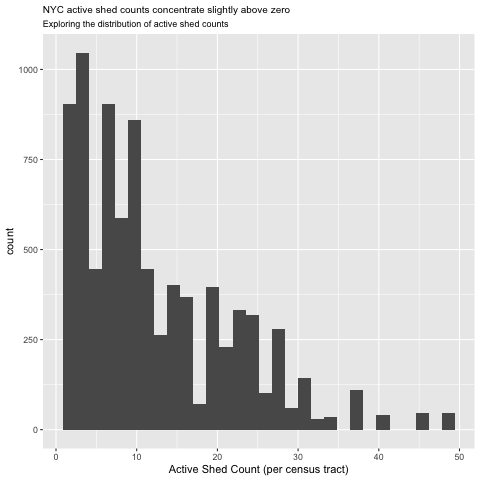

In [27]:
%%R -i sheds_by_census_tract

# In General —— Active Shed Count (per census tract): 

ggplot(merged_data_new) + 
    aes(x=active_shed_licenses)+
    geom_histogram() +
    labs(
    x = 'Active Shed Count (per census tract)',
    title = 'NYC active shed counts concentrate slightly above zero',
    subtitle = 'Exploring the distribution of active shed counts'
    ) +
    theme(
    plot.title = element_text(size = 10), # Adjust the title size
    plot.subtitle = element_text(size = 9) # Adjust the subtitle size
    )

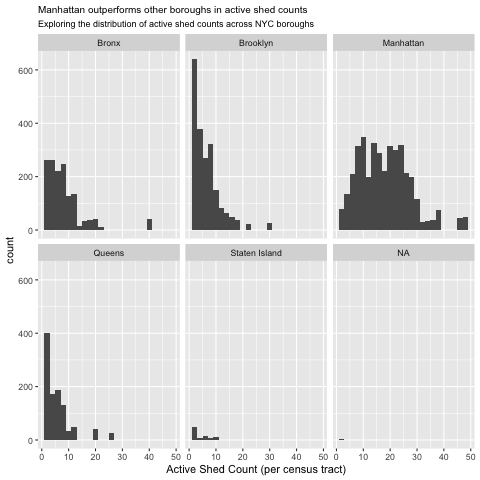

In [28]:
%%R -i sheds_by_census_tract

# By Borough —— Active Shed Count (per census tract): 

ggplot(merged_data_new) + 
    aes(x=active_shed_licenses) +
    geom_histogram(binwidth=2) +
    facet_wrap(~Borough.Name) +
    labs(
    x = 'Active Shed Count (per census tract)',
    title = 'Manhattan outperforms other boroughs in active shed counts',
    subtitle = 'Exploring the distribution of active shed counts across NYC boroughs'
    ) +
    theme(
    plot.title = element_text(size = 10), # Adjust the title size
    plot.subtitle = element_text(size = 9) # Adjust the subtitle size
    )

#### Density plot: 

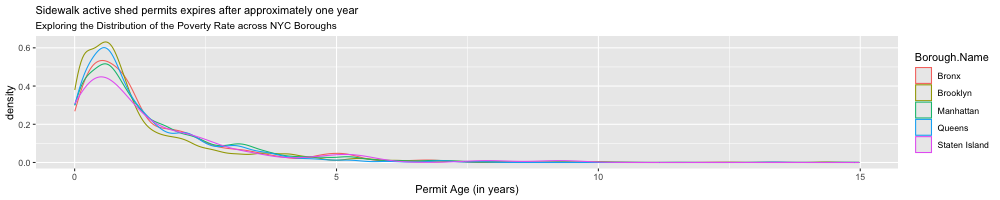

In [29]:
%%R -w 1000 -h 200

# Permit Age (in years): 

ggplot(merged_data_new) + 
    aes(x=Age..in.years.,color=Borough.Name) +
    geom_density() +
    labs(
    x = 'Permit Age (in years)',
    title = 'Sidewalk active shed permits expires after approximately one year',
    subtitle = 'Exploring the Distribution of the Poverty Rate across NYC Boroughs'
    ) +
    theme(
    plot.title = element_text(size = 11), # Adjust the title size
    plot.subtitle = element_text(size = 10) # Adjust the subtitle size
    )

### Continuous Variable 2 —— Linear Shed Height (in feet): 

#### Histogram:

#### Density plot:

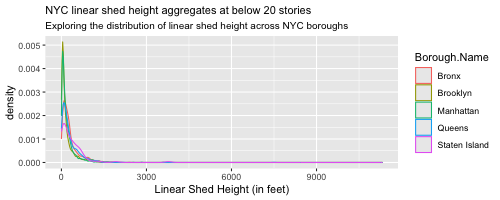

In [30]:
%%R -w 500 -h 200
# plot for continuous variable 1:
# make sure to make a meaningful title and subtitle

ggplot(merged_data_new) + 
    aes(x=Sidewalk.Shed.Linear.Feet, color=Borough.Name) +
    geom_density() +
    labs(
    x = 'Linear Shed Height (in feet)',
    title = 'NYC linear shed height aggregates at below 20 stories',
    subtitle = 'Exploring the distribution of linear shed height across NYC boroughs'
    ) +
    theme(
    plot.title = element_text(size = 11), # Adjust the title size
    plot.subtitle = element_text(size = 10) # Adjust the subtitle size
    )

### Discrete Variables

If there are any discrete variables you'd like to analyze, you can do that with charts here.

In [31]:
# There's no feasible discrete variables working for my dataset. 